### Name : Shobhit Mirjankar
### Batch : C32
### Roll No : 1902101

In [17]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [18]:
dataset = pd.read_csv('churn.csv')[0:201]
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
196,616,Spain,Female,32,6,0.00,2,1,1,43001.46,0
197,721,Germany,Male,37,3,107720.64,1,1,1,158591.12,0
198,501,France,Male,57,10,0.00,2,1,1,47847.19,0
199,521,France,Male,35,6,96423.84,1,1,0,10488.44,0


In [19]:
# EDA

print('Columns : ',list(dataset.columns))
print()
print('Number of missing values : ',dataset.isnull().sum().sum())
print()
dataset.describe()

Columns :  ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Number of missing values :  0



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000
mean,640.467662,37.965174,5.174129,74504.686269,1.542289,0.676617,0.482587,99189.930398,0.20398
std,108.463313,9.763902,2.987395,62726.490142,0.591145,0.468935,0.500944,57641.051220,0.40396
min,376.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,600.360000,0.00000
25%,553.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,47125.110000,0.00000
50%,646.000000,36.000000,5.000000,96645.540000,2.000000,1.000000,0.000000,99449.860000,0.00000
75%,722.000000,43.000000,8.000000,125851.930000,2.000000,1.000000,1.000000,147132.460000,0.00000
max,850.000000,75.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.00000


In [20]:
# Data Analysis

print(dataset['Geography'].unique())
print(dataset['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [21]:
# Data Preprocessing

le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

dataset = pd.get_dummies(dataset,columns = ['Geography'])
dataset

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,616,0,32,6,0.00,2,1,1,43001.46,0,0,0,1
197,721,1,37,3,107720.64,1,1,1,158591.12,0,0,1,0
198,501,1,57,10,0.00,2,1,1,47847.19,0,1,0,0
199,521,1,35,6,96423.84,1,1,0,10488.44,0,1,0,0


In [23]:
dataset[['Geography_France','Geography_Germany','Geography_Spain','EstimatedSalary','Exited']]

,Geography_France,Geography_Germany,Geography_Spain,EstimatedSalary,Exited
0,1,0,0,101348.88,1
1,0,0,1,112542.58,0
2,1,0,0,113931.57,1
3,1,0,0,93826.63,0
4,0,0,1,79084.10,0
...,...,...,...,...,...
196,0,0,1,43001.46,0
197,0,1,0,158591.12,0
198,1,0,0,47847.19,0
199,1,0,0,10488.44,0


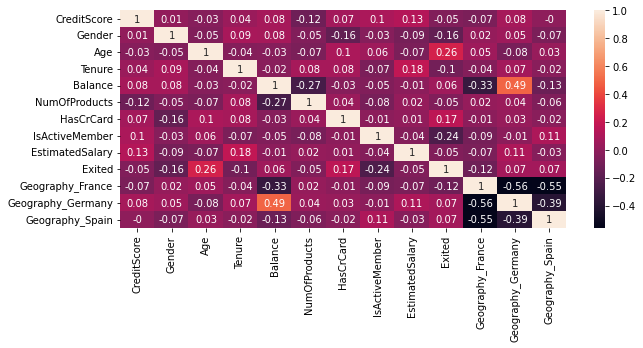

In [6]:
# Feature Importance

plt.figure(figsize=(10, 4))
correl_matrix = dataset.corr().round(2)
sns.heatmap(data=correl_matrix, annot=True)
plt.show()

Hence we can see that most important features for predicting class label 'Exited' are : Age, isActiveMember, HasCrCard,
Gender, Geography_France

In [7]:
X = dataset[['Age','Geography_France','IsActiveMember','HasCrCard','Gender']]
y = dataset['Exited']

X

,Age,Geography_France,IsActiveMember,HasCrCard,Gender
0,42,1,1,1,0
1,41,0,1,0,0
2,42,1,0,1,0
3,39,1,0,0,0
4,43,0,1,1,0
...,...,...,...,...,...
196,32,0,1,1,0
197,37,0,1,1,1
198,57,1,1,1,1
199,35,1,0,1,1


In [8]:
y

0      1
1      0
2      1
3      0
4      0
      ..
196    0
197    0
198    0
199    0
200    0
Name: Exited, Length: 201, dtype: int64

In [9]:
# Train test split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.1,
                                                        random_state=13)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2,
                                                        random_state=13)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y,test_size=0.3,
                                                        random_state=13)

X_train1

,Age,Geography_France,IsActiveMember,HasCrCard,Gender
143,52,0,0,1,1
68,35,0,1,0,0
7,29,0,0,1,0
125,42,1,0,1,1
175,35,0,1,1,0
...,...,...,...,...,...
98,22,0,0,0,1
16,58,0,0,1,1
74,36,1,1,0,1
176,30,1,1,1,0


In [10]:
y_train1

143    1
68     0
7      1
125    1
175    0
      ..
98     0
16     1
74     0
176    0
82     0
Name: Exited, Length: 180, dtype: int64

## Decision Tree Classifier (90-10 Split)

In [11]:
# Decision Tree Classifier for 90-10 Split

dtree = DecisionTreeClassifier(random_state=13)
dtree.fit(X_train1,y_train1)
y_pred_train1 = dtree.predict(X_train1)
y_pred_test1 = dtree.predict(X_test1)

print('90-10 Model performance on Training Set : \n')
print(classification_report(y_train1,y_pred_train1))
print()
print()
print('90-10 Model performance on Test Set : \n')
print(classification_report(y_test1,y_pred_test1))
print()
print()
X_ip = list(map(int,
       input("Enter Age, isActiveMember, HasCrCard, Gender, Geography_France : ")
                .split()))[:5]
print('Predicted class : ',dtree.predict([X_ip])[0])
print()
print()
print('Result : ')
pd.DataFrame({'Actual':y_test1,'Predicted':y_pred_test1})

90-10 Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       147
           1       0.96      0.82      0.89        33

    accuracy                           0.96       180
   macro avg       0.96      0.91      0.93       180
weighted avg       0.96      0.96      0.96       180



90-10 Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.43      0.38      0.40         8

    accuracy                           0.57        21
   macro avg       0.54      0.53      0.53        21
weighted avg       0.56      0.57      0.57        21



Enter Age, isActiveMember, HasCrCard, Gender, Geography_France : 40 0 1 1 0
Predicted class :  1


Result : 


,Actual,Predicted
101,0,0
87,0,0
23,0,0
140,0,1
114,1,0
190,1,0
65,0,0
111,0,1
33,0,1
196,0,0


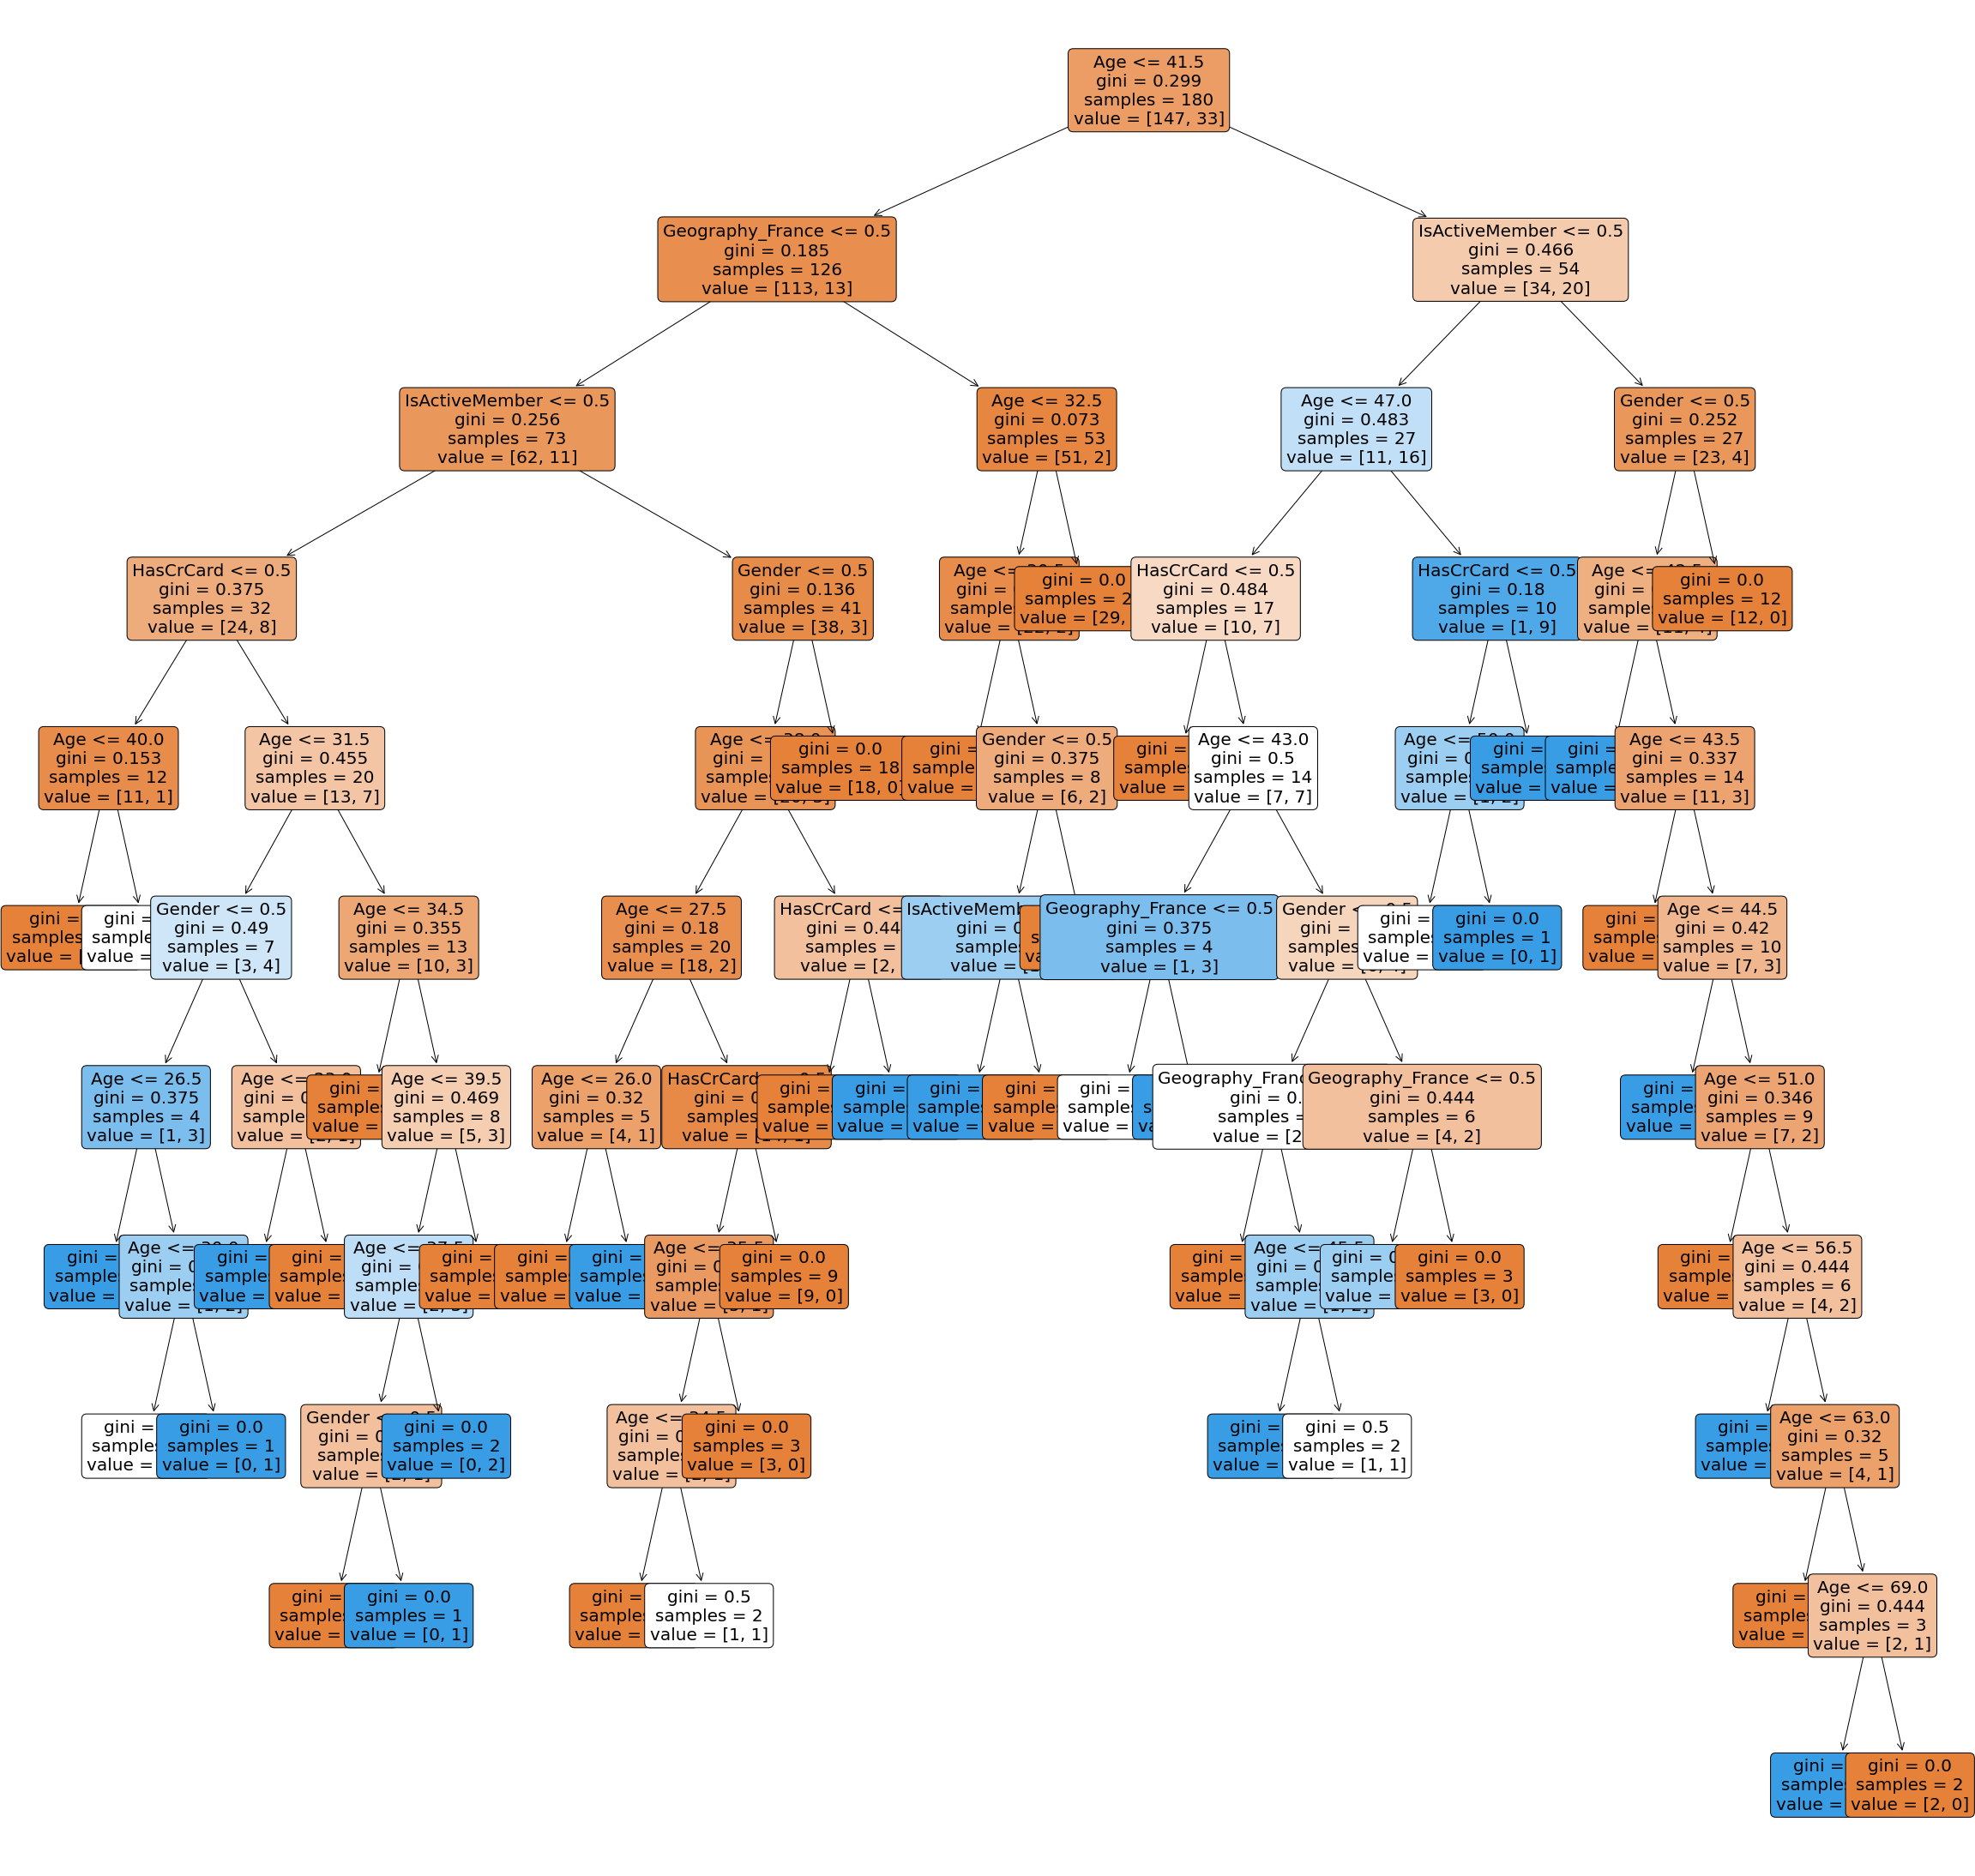

In [12]:
# Visualize the Tree

plt.figure(figsize=(40,40)) 
plot_tree(dtree, feature_names = X_train1.columns, filled=True, fontsize=20,
          rounded = True)
plt.show()

Training set gave 96% accuracy and test set gave 57% accuracy hence model is overfitted

## Decision Tree Classifier (80-20 Split)

In [13]:
# Decision Tree Classifier for 80-20 Split

dtree = DecisionTreeClassifier(random_state=13)
dtree.fit(X_train2,y_train2)
y_pred_train2 = dtree.predict(X_train2)
y_pred_test2 = dtree.predict(X_test2)

print('80-20 Model performance on Training Set : \n')
print(classification_report(y_train2,y_pred_train2))
print()
print()
print('80-20 Model performance on Test Set : \n')
print(classification_report(y_test2,y_pred_test2))
print()
print()
X_ip = list(map(int,
       input("Enter Age, isActiveMember, HasCrCard, Gender, Geography_France : ")
                .split()))[:5]
print('Predicted class : ',dtree.predict([X_ip])[0])
print()
print()
print('Result : ')
pd.DataFrame({'Actual':y_test2,'Predicted':y_pred_test2})

80-20 Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       133
           1       0.96      0.85      0.90        27

    accuracy                           0.97       160
   macro avg       0.96      0.92      0.94       160
weighted avg       0.97      0.97      0.97       160



80-20 Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.60      0.43      0.50        14

    accuracy                           0.71        41
   macro avg       0.67      0.64      0.65        41
weighted avg       0.69      0.71      0.69        41



Enter Age, isActiveMember, HasCrCard, Gender, Geography_France : 40 0 1 1 0
Predicted class :  0


Result : 


,Actual,Predicted
101,0,0
87,0,0
23,0,0
140,0,1
114,1,0
190,1,0
65,0,0
111,0,1
33,0,1
196,0,0


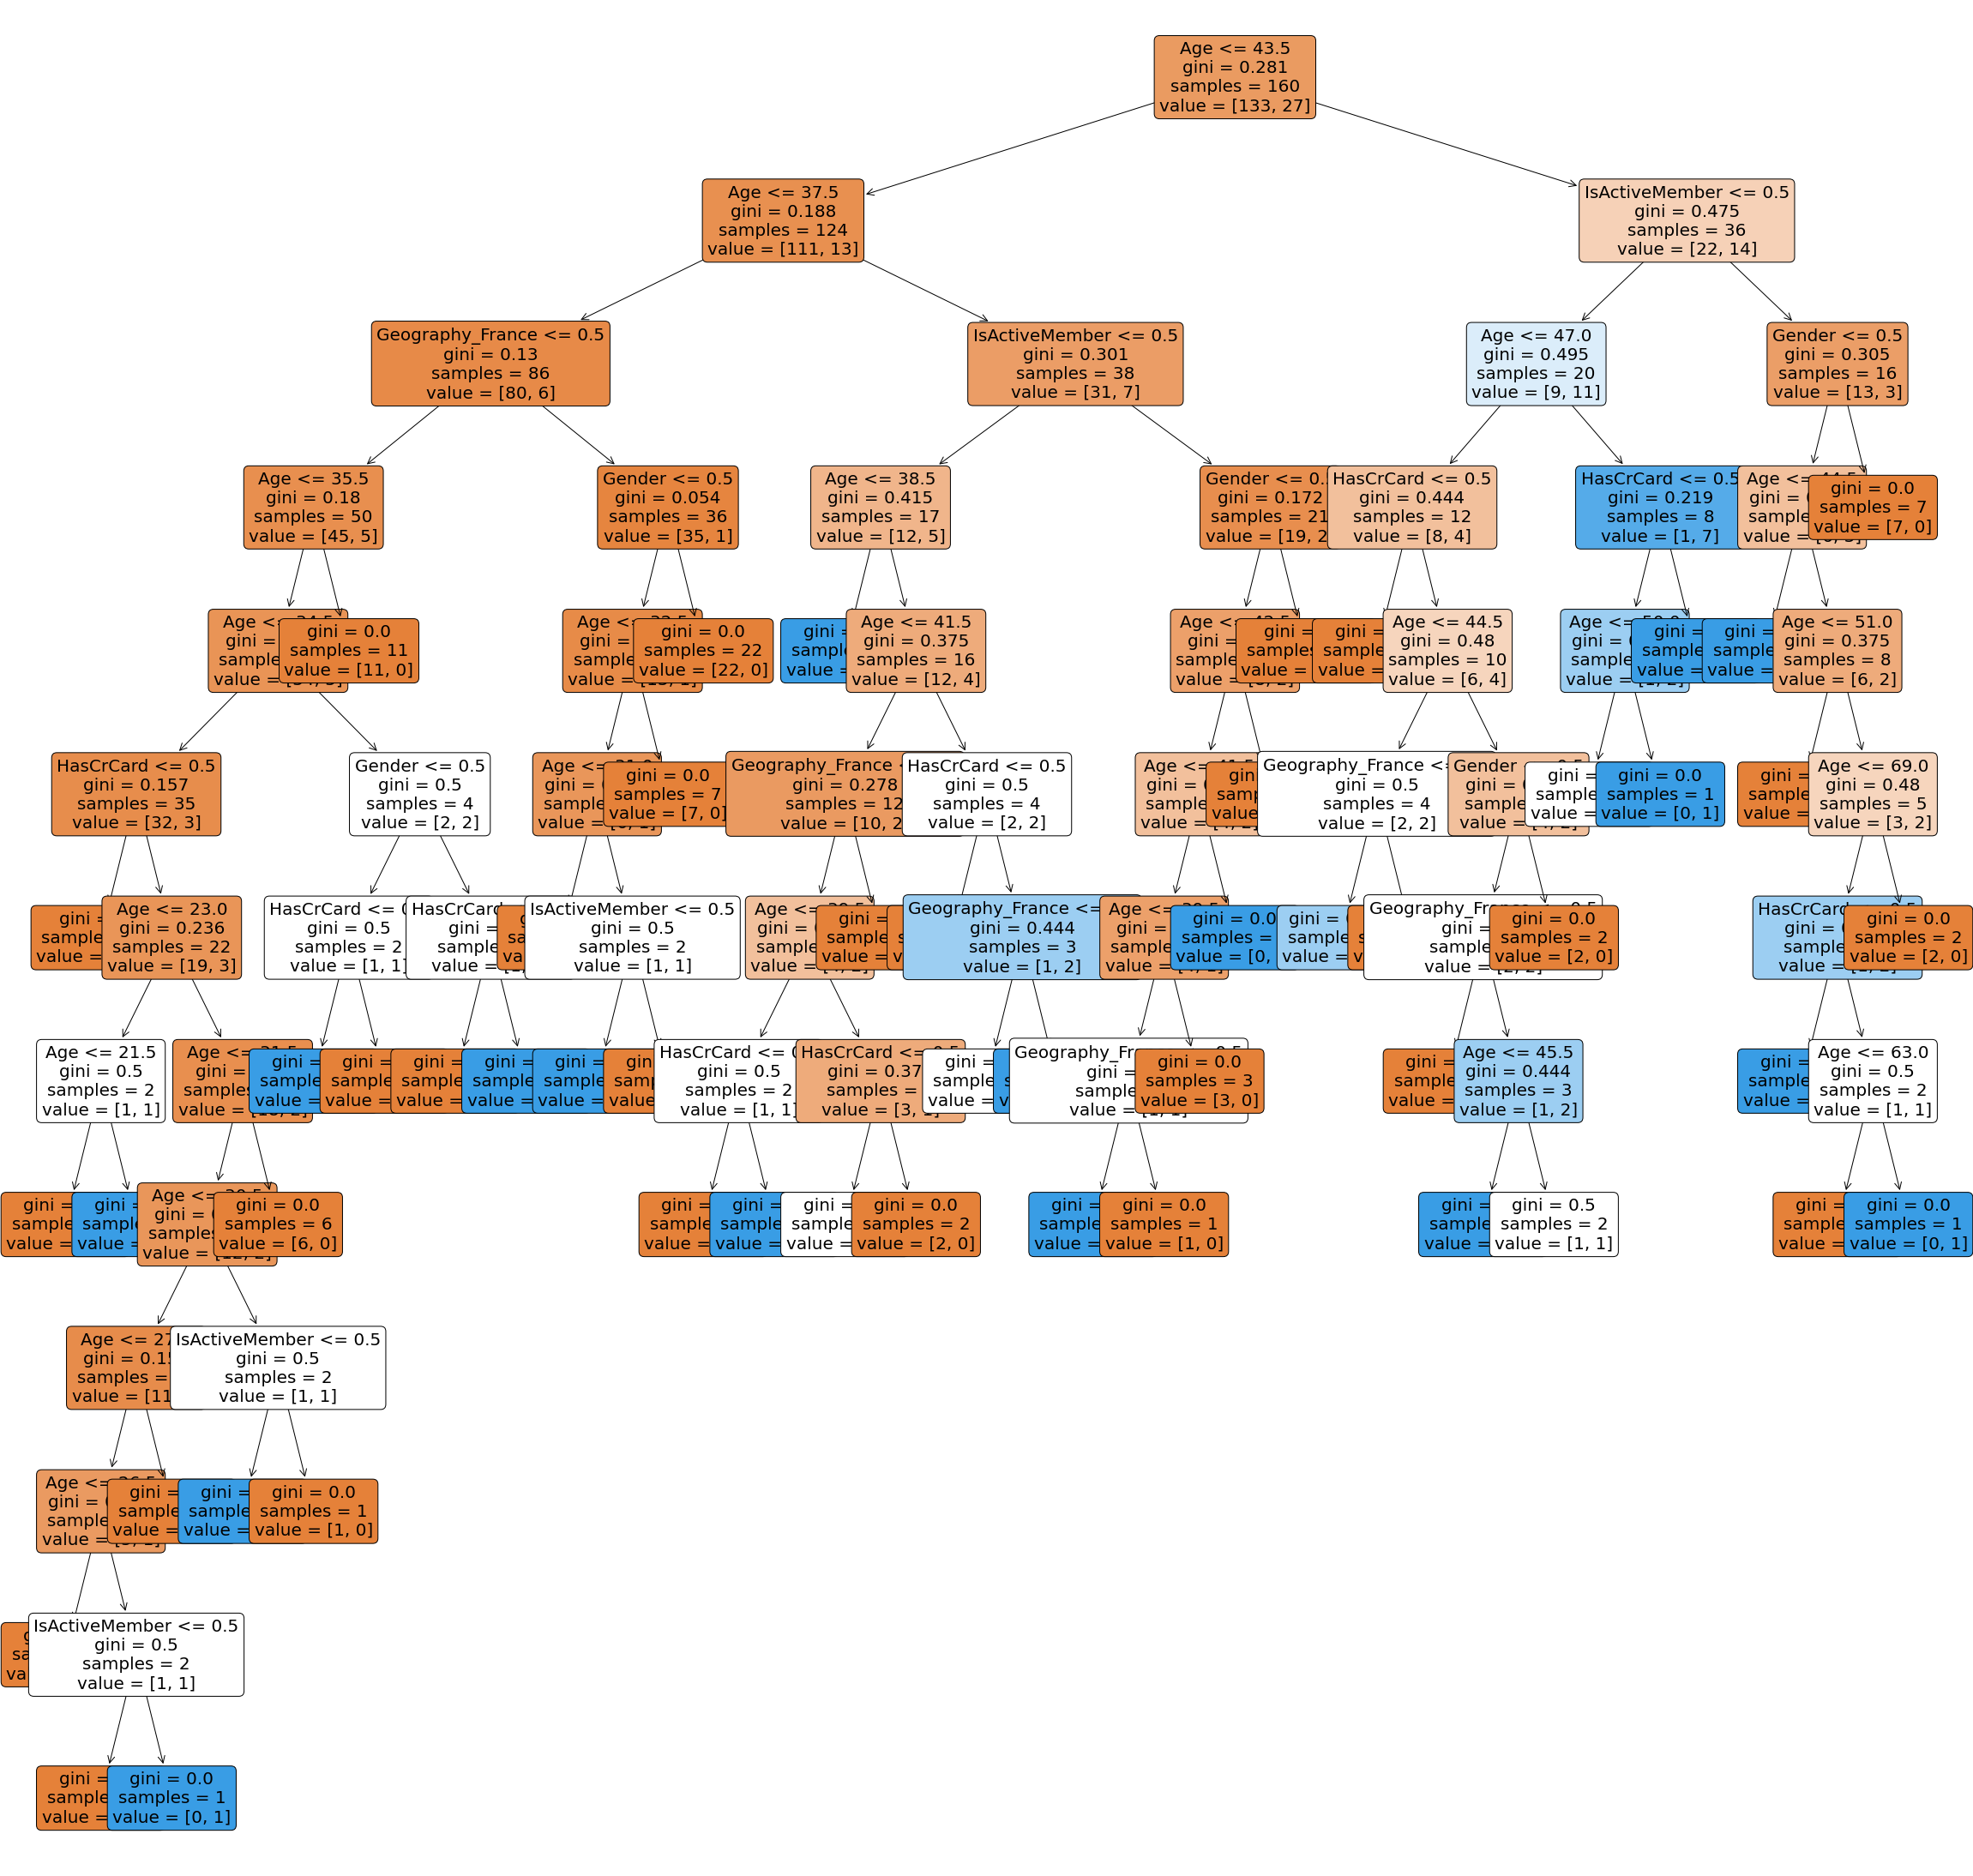

In [14]:
# Visualize the Tree

plt.figure(figsize=(40,40)) 
plot_tree(dtree, feature_names = X_train2.columns, filled=True, fontsize=20,
          rounded = True)
plt.show()

Training set gave 97% accuracy and test set gave 71% accuracy hence model is slightly overfitted

## Decision Tree Classifier (70-30 Split)

In [15]:
# Decision Tree Classifier for 70-30 Split

dtree = DecisionTreeClassifier(random_state=13)
dtree.fit(X_train3,y_train3)
y_pred_train3 = dtree.predict(X_train3)
y_pred_test3 = dtree.predict(X_test3)

print('70-30 Model performance on Training Set : \n')
print(classification_report(y_train3,y_pred_train3))
print()
print()
print('70-30 Model performance on Test Set : \n')
print(classification_report(y_test3,y_pred_test3))
print()
print()
X_ip = list(map(int,
       input("Enter Age, isActiveMember, HasCrCard, Gender, Geography_France : ")
                .split()))[:5]
print('Predicted class : ',dtree.predict([X_ip])[0])
print()
print()
print('Result : ')
pd.DataFrame({'Actual':y_test3,'Predicted':y_pred_test3})

70-30 Model performance on Training Set : 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       114
           1       0.96      0.88      0.92        26

    accuracy                           0.97       140
   macro avg       0.97      0.94      0.95       140
weighted avg       0.97      0.97      0.97       140



70-30 Model performance on Test Set : 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        46
           1       0.47      0.47      0.47        15

    accuracy                           0.74        61
   macro avg       0.65      0.65      0.65        61
weighted avg       0.74      0.74      0.74        61



Enter Age, isActiveMember, HasCrCard, Gender, Geography_France : 40 0 1 1 0
Predicted class :  0


Result : 


,Actual,Predicted
101,0,0
87,0,0
23,0,0
140,0,1
114,1,0
...,...,...
32,0,1
19,0,0
17,0,0
173,0,0


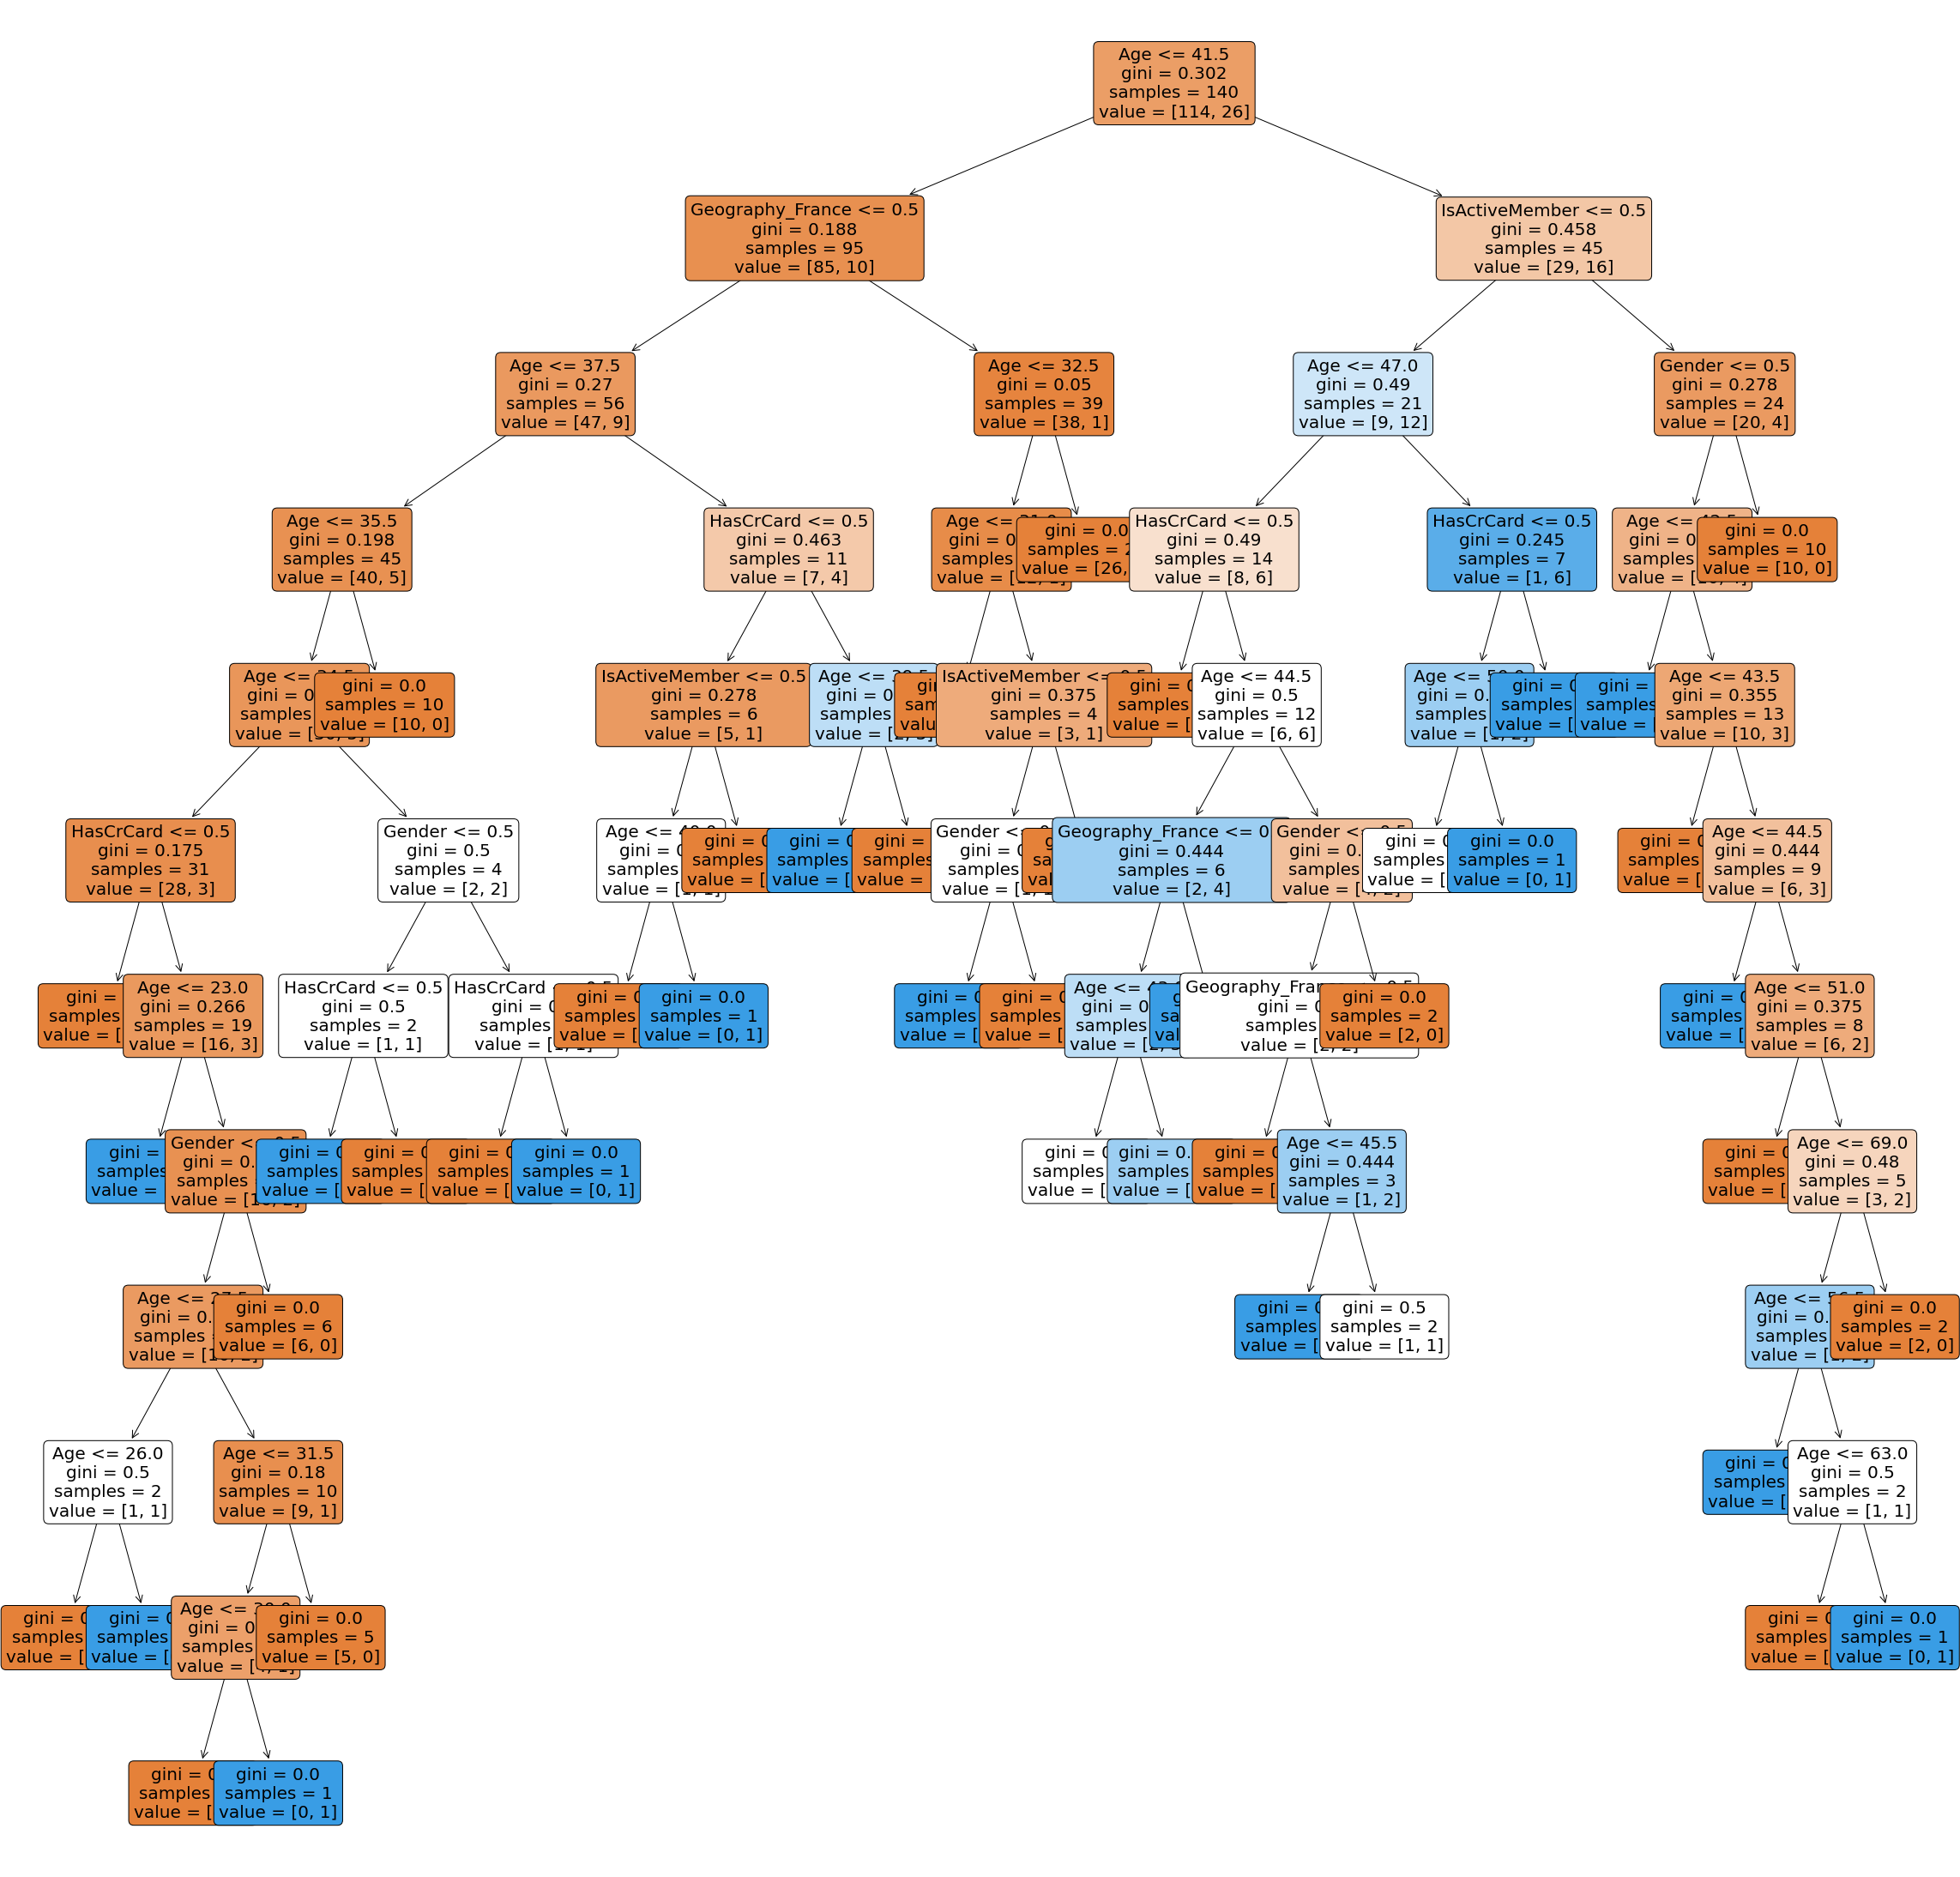

In [16]:
# Visualize the Tree

plt.figure(figsize=(40,40)) 
plot_tree(dtree, feature_names = X_train3.columns, filled=True, fontsize=20,
          rounded = True)
plt.show()

Training set gave 97% accuracy and test set gave 74% accuracy hence model is slightly overfitted

#### Conclusion : Best model obtained using 70% data for training and 30% data for testing with accuracy of 97% on training set and 74% on test set. Also, it has been observed that as we decrease the training set size, the test set accuracy increases and hence overfitting reduces.